In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from matplotlib import rc
import matplotlib.pylab as plt
import tensorflow as tf
import scipy.io 
import tensorflow.keras.backend as K 
def cos_distance(y_true, y_pred):
    def l2_normalize(x, axis):
        norm = K.sqrt(K.sum(K.square(x), axis=axis, keepdims=True))
        return K.maximum(x, K.epsilon()) / K.maximum(norm, K.epsilon())

    y_true = l2_normalize(y_true, axis=-1)
    y_pred = l2_normalize(y_pred, axis=-1)
    return tf.math.acos(K.mean(K.sum(y_true * y_pred, axis=-1)))
    
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024*9)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


In [9]:
shots_hs = 4
shots_ms = 4
results_folder = 'results_convergence'

total_shots = shots_ms+shots_hs
ses = list(range(1,total_shots+1))
seeds = [0,23,30,100,145,400]
psnr_v = np.zeros((len(ses),len(seeds)))
time_v = np.zeros((len(ses),len(seeds)))
for i,shots_per_eval in enumerate(range(1,total_shots+1)):
        for j,seed in enumerate([0,23,30,100,145,400]):
                path = f'{results_folder}/init_sms{shots_ms}_shs_{shots_hs}_se_{shots_per_eval}_seed_{seed}/metrics.mat'
                a = scipy.io.loadmat(path)
                psnr_v[i,j] = np.max(a['psnr'])
                time_v[i,j] = np.max(a['time'])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


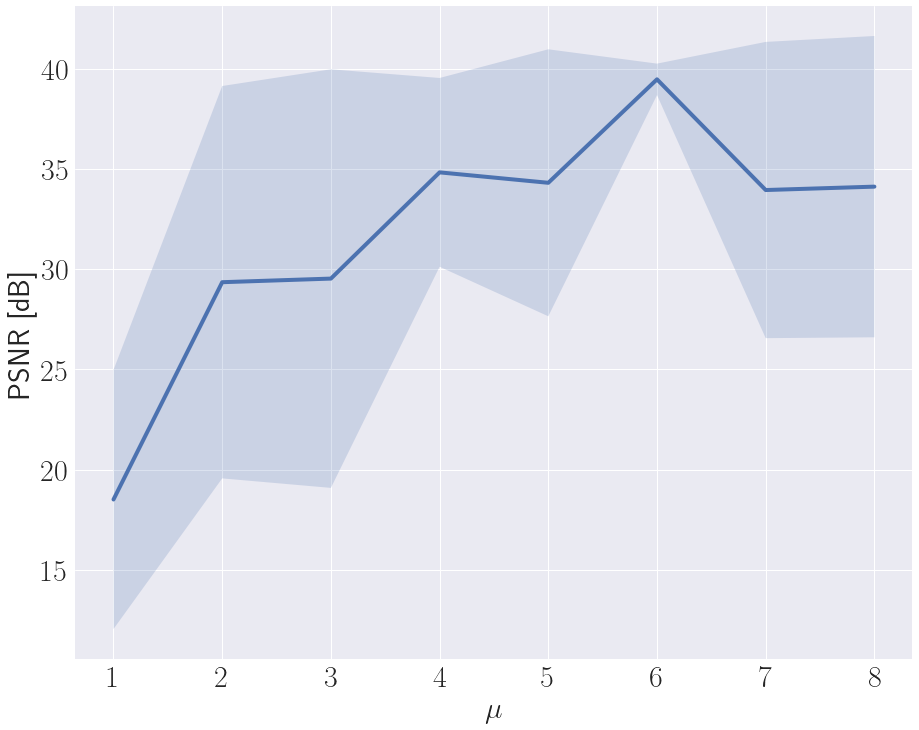

In [3]:
from matplotlib import rc
fs = 30
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
mv_psnr = np.mean(psnr_v,1)
stdv_psnr = np.std(psnr_v,1)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
ax1.plot(ses,mv_psnr,linewidth=4)
ax1.fill_between(ses, mv_psnr-stdv_psnr,  mv_psnr+stdv_psnr,alpha=0.2)
#ax1.plot(params,np.ones((7,1))*psnr_base,label = 'No Regularization',linewidth=4)

# ax2 = ax1.twinx()
#

#
#
# ax2.plot(params,mse_reg.T,label = regs_w,linewidth=4)
# ax2.plot(params,np.ones((7,1))*mse_base,label = 'No Regularization',linewidth=4)
#
#
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

ax1.set_xlabel('$\mu$',fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

# ax2.tick_params(axis='x',labelsize=fs)
# ax2.tick_params(axis='y',labelsize=fs)


ax1.set_ylabel('PSNR [dB]',fontsize=fs)
# ax1.set_xscale('log')
ax1.legend(fontsize=fs)
ax1.legend(fontsize=fs)


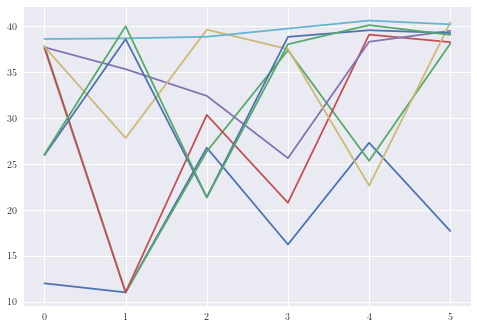

In [36]:
plt.plot(psnr_v.T)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


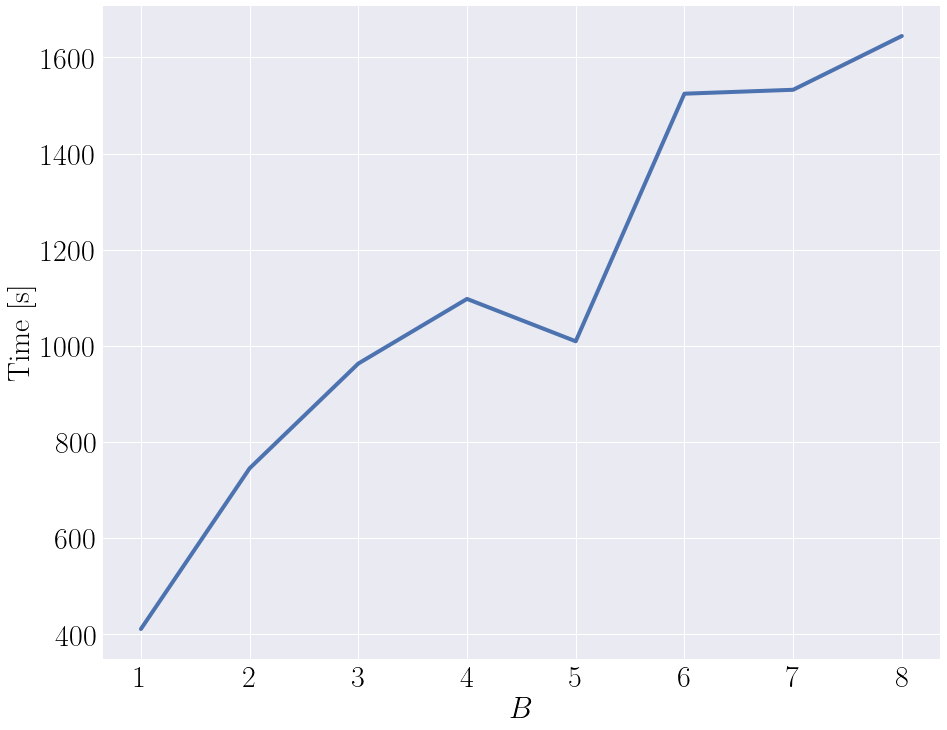

In [27]:
from matplotlib import rc
fs = 30
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

mv_time = np.mean(time_v,1)
stdv_time = np.std(time_v,1)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
ax1.plot(ses,mv_time,linewidth=4)
# ax1.fill_between(ses, mv_time-stdv_time,   mv_time+stdv_time,alpha=0.2)
#ax1.plot(params,np.ones((7,1))*psnr_base,label = 'No Regularization',linewidth=4)

# ax2 = ax1.twinx()
#

#
#
# ax2.plot(params,mse_reg.T,label = regs_w,linewidth=4)
# ax2.plot(params,np.ones((7,1))*mse_base,label = 'No Regularization',linewidth=4)
#
#
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

ax1.set_xlabel('$B$',fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

# ax2.tick_params(axis='x',labelsize=fs)
# ax2.tick_params(axis='y',labelsize=fs)


ax1.set_ylabel('Time [s]',fontsize=fs)
# ax1.set_xscale('log')
ax1.legend(fontsize=fs)
ax1.legend(fontsize=fs)
plt.savefig('time.svg')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


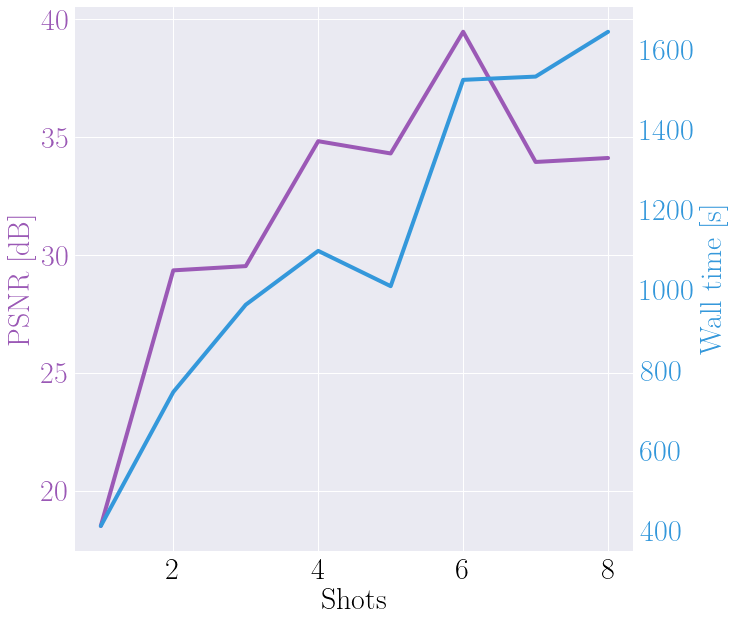

In [65]:
fs = 30
c1 = "#9b59b6"
c2 = "#3498db"
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

color = 'tab:red'

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(ses,mv_psnr,linewidth=4,color=c1)
# ax1.fill_between(ses, mv_psnr-stdv_psnr,  mv_psnr+stdv_psnr,alpha=0.2,color=c1)
ax2 = ax1.twinx()
ax2.plot(ses,mv_time,linewidth=4,color=c2)
# ax2.fill_between(ses, mv_time-stdv_time,   mv_time+stdv_time,alpha=0.2,color=c2)
ax2.grid(None)

ax1.set_xlabel('Shots',fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs,labelcolor=c1)
ax2.tick_params(axis='y',labelsize=fs,labelcolor=c2)

# ax2.tick_params(axis='x',labelsize=fs)
# ax2.tick_params(axis='y',labelsize=fs)


ax1.set_ylabel('PSNR [dB]',fontsize=fs,color=c1)
ax2.set_ylabel('Wall time [s]',fontsize=fs,color=c2)
# ax1.set_xscale('log')
ax1.legend(fontsize=fs)
ax1.legend(fontsize=fs)
plt.savefig('psnr_time.svg')
plt.show()


In [10]:
loss_v = np.zeros((len(ses),len(seeds),15000))
for i,shots_per_eval in enumerate(range(1,total_shots+1)):
        for j,seed in enumerate([0,23,30,100,145,400]):
                path = f'{results_folder}/init_sms{shots_ms}_shs_{shots_hs}_se_{shots_per_eval}_seed_{seed}/metrics.mat'
                a = scipy.io.loadmat(path)
                loss_v[i,j,:] =a['loss']
                


In [29]:
a.keys()

dict_keys(['__header__', '__version__', '__globals__', 'psnr', 'time', 'loss'])

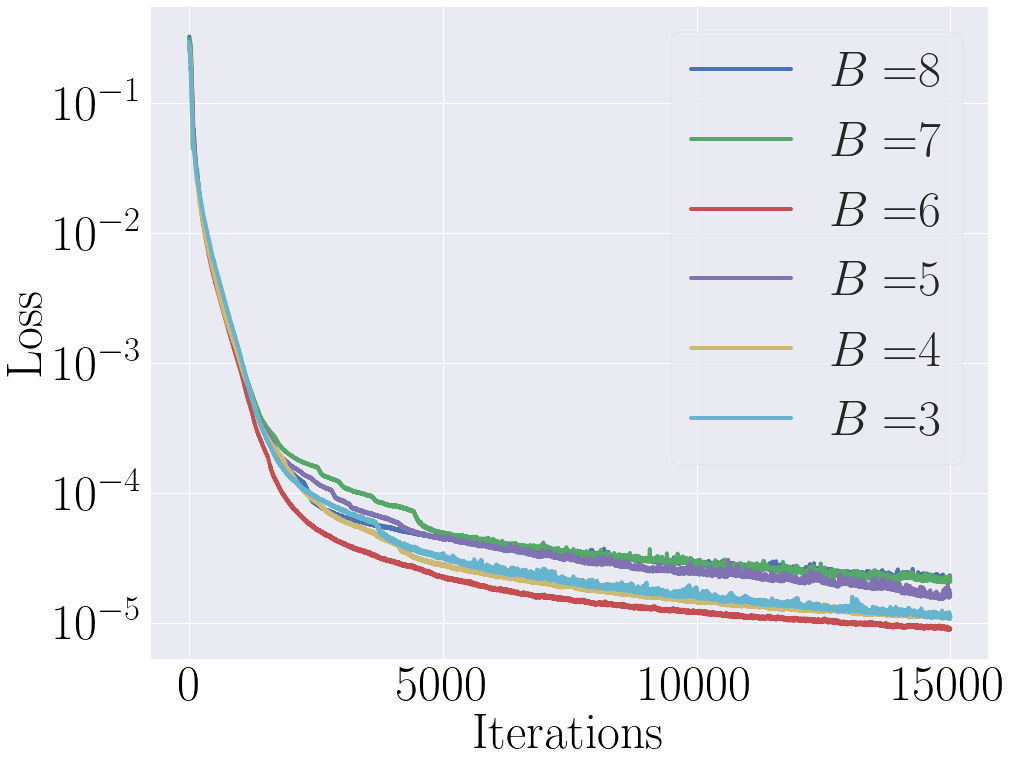

In [14]:
loss_m = np.mean(loss_v,1)
from matplotlib import rc
fs = 50
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

mv_time = np.mean(time_v,1)
stdv_time = np.std(time_v,1)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
for i in  list(range(3,9))[::-1]:
    ax1.plot(loss_m[i-1,:15000],linewidth=4,label = f'$B=${i}')
# ax1.fill_between(ses, mv_time-stdv_time,   mv_time+stdv_time,alpha=0.2)
#ax1.plot(params,np.ones((7,1))*psnr_base,label = 'No Regularization',linewidth=4)

# ax2 = ax1.twinx()
#

#
#
# ax2.plot(params,mse_reg.T,label = regs_w,linewidth=4)
# ax2.plot(params,np.ones((7,1))*mse_base,label = 'No Regularization',linewidth=4)
#
ax1.set_ylabel('Loss',fontsize=fs)

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax1.set_yscale('log')

ax1.set_xlabel('Iterations',fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

# ax2.tick_params(axis='x',labelsize=fs)
# ax2.tick_params(axis='y',labelsize=fs)


ax1.legend(fontsize=fs,frameon=True)
# ax1.legend(fontsize=fs)
plt.savefig('loss_plot.svg')

In [3]:
shots_hs = 4
shots_ms = 4
results_folder = 'results_dataset'

total_shots = shots_ms+shots_hs
ses = list(range(1,total_shots+1))
imgs = 22
psnr_v = np.zeros((len(ses),imgs,15000))
loss_v = np.zeros((len(ses),imgs,15000))

ssim_v = np.zeros((len(ses),imgs))
time_v = np.zeros((len(ses),imgs))

for i,shots_per_eval in enumerate(range(1,total_shots+1)):
        for j,image in enumerate(range(1,imgs+1)):
                path = f'{results_folder}/init_sms{shots_ms}_shs_{shots_hs}_se_{shots_per_eval}_im_{image}/metrics.mat'
                a = scipy.io.loadmat(path)
                psnr_v[i,j,:] = a['psnr']
                loss_v[i,j,:] = a['loss']
                time_v[i,j] = a['time']

                # rec = a['rec']
                # data_path = 'C:\Roman\datasets\kaist/all_images/Image_'+str(image)

                # Mat = scipy.io.loadmat(data_path)
                # # testSI=np.double(Mat['im'])
                # testSI = np.double(Mat['img'])
                # GT = testSI / np.max(testSI)
                # GT = tf.cast(tf.expand_dims(GT,0),rec.dtype)


                # ssim_v[i,j] = tf.image.ssim(GT,rec,1).numpy()


                # time_v[i,j] = np.max(a['time'])



dict_keys(['__header__', '__version__', '__globals__', 'psnr', 'time', 'loss', 'rec'])

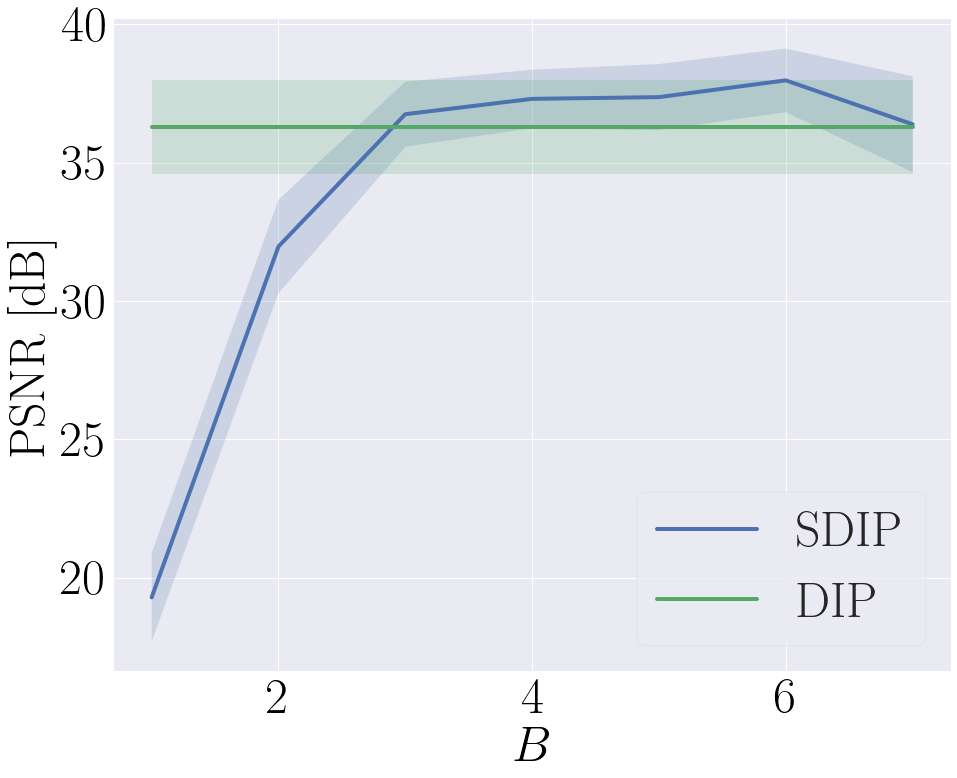

In [46]:
from matplotlib import rc
fs = 50
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
mv_psnr = np.mean(psnr_v,1)
stdv_psnr = np.std(psnr_v,1)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
ax1.plot(ses[:-1],mv_psnr[:-1],linewidth=4,label='SDIP')
ax1.plot(ses[:-1],np.ones((7,1))*mv_psnr[-1],linewidth=4,label='DIP')
l1 = ( mv_psnr[:-1]-stdv_psnr[:-1]/2)
l2 = (mv_psnr[:-1]+stdv_psnr[:-1]/2)
ax1.fill_between(ses[:-1], l1, l2,alpha=0.2)
l1 = np.ones((1,7))*(mv_psnr[-1]-stdv_psnr[-1]/2)
l2 = np.ones((1,7))*(mv_psnr[-1]+stdv_psnr[-1]/2)
ax1.fill_between(ses[:-1], l1[0], l2[0] ,alpha=0.2)
ax1.set_xlabel('$B$',fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)


ax1.set_ylabel('PSNR [dB]',fontsize=fs)
ax1.legend(fontsize=fs,loc='lower right',frameon=True)
plt.savefig('psnr_dataset.svg')


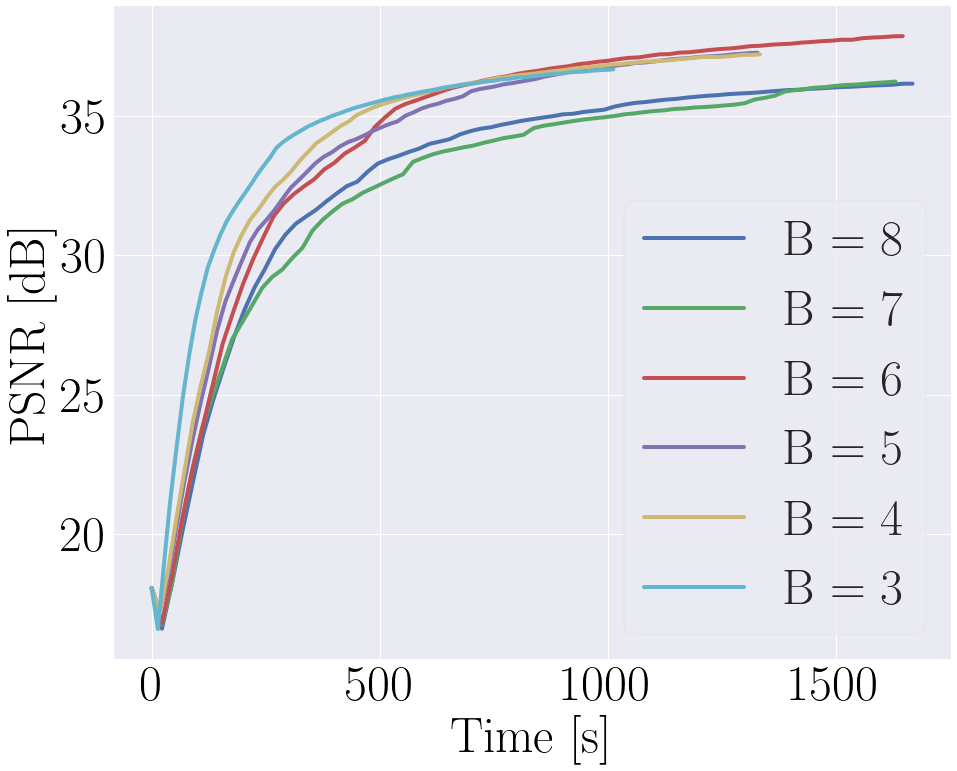

In [4]:
from matplotlib import rc
fs = 50
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
mv_psnr = np.mean(psnr_v,1)
stdv_psnr = np.std(psnr_v,1)
time_mean = np.mean(time_v,1)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
for i in list(range(3,9))[::-1]:
    x = np.linspace(0,time_mean[i-1],15000)[::200]
    a = ax1.plot(x,mv_psnr[i-1][::200],linewidth=4,label=f'B = {i}')
    # ax1.plot(x[-1],mv_psnr[i-1][-1],marker='o',markersize=15)
    ax1.tick_params(axis='x',labelsize=fs)
    ax1.tick_params(axis='y',labelsize=fs)


    ax1.set_ylabel('PSNR [dB]',fontsize=fs)
    ax1.set_xlabel('Time [s]',fontsize=fs)
    ax1.legend(fontsize=fs,loc='lower right',frameon=True)
plt.savefig('psnr_time_dataset.svg')


In [91]:
time_v[:,0]


array([ 399.88634229,  395.65996814,  579.51135707,  774.22118926,
        790.14118624, 1055.95468807, 1044.61920786, 1086.9780407 ])

In [15]:
results_folder = 'results_repetitions'
loss_v = np.zeros((8,20))
ses = list(range(1,8+1))

for i,shots_per_eval in enumerate(range(1,8+1)):
        for j,rep in enumerate(range(20)):
                path = f'{results_folder}/init_sms4_shs_4_se_{shots_per_eval}_opt_ca_False_dataset_kaist_rep_{rep}/metrics.mat'
                a = scipy.io.loadmat(path)
                loss_v[i,j] =a['psnr'].max()
                

loss_v1 = np.zeros((8,20))
ses = list(range(1,8+1))

for i,shots_per_eval in enumerate(range(1,8+1)):
        for j,rep in enumerate(range(20)):
                path = f'{results_folder}/init_sms4_shs_4_se_{shots_per_eval}_opt_ca_True_dataset_kaist_rep_{rep}/metrics.mat'
                a = scipy.io.loadmat(path)
                loss_v1[i,j] =a['psnr'].max()


In [35]:

results_folder = 'results_icvl'
train_path = 'C:\Roman\datasets\icvl/validation'
hyperfiles = [fn for fn in listdir(train_path) if isfile(join(train_path, fn)) and fn.lower().endswith('.mat')]
pt = np.zeros((3,4,20)) 
ct = np.zeros((3,4,20)) 
st = np.zeros((3,4,20)) 
for r,k in enumerate(range(20)):
    for i,shots_per_eval in enumerate([4,8,6]):
            for j,snr in enumerate([20,25,30,35]):
                path = f'{results_folder}/init_sms4_shs_4_se_{shots_per_eval}_im_{k}_snr_{snr}/metrics.mat'
                a = scipy.io.loadmat(path)
                img = a['rec']

            
                gt = scipy.io.loadmat(train_path + '/' + hyperfiles[k] )['rad'][128:128+256,128:128+256, 0:30]
                gt = gt/np.max(gt)
                img = tf.cast(img,gt.dtype)
                pt[i,j,r] =a['psnr'].max()

                st[i,j,r] = tf.image.ssim(img,gt,1)
                ct[i,j,r] = cos_distance(img,gt)
      
                    

In [45]:
# print(np.mean(pt[0,:,:],-1))
# print(np.mean(st[0,:,:],-1))
# print(np.mean(ct[0,:,:],-1))
# print(np.mean(pt[1,:,:],-1))
# print(np.mean(st[1,:,:],-1))
# print(np.mean(ct[1,:,:],-1))
# print(np.mean(pt[2,:,:],-1))
# print(np.mean(st[2,:,:],-1))
print(np.mean(pt[2,:,:],-1))
print(np.mean(st[2,:,:],-1))
print(np.mean(ct[2,:,:],-1))



[26.59797907 29.46056633 30.9592329  34.83720989]
[0.138858   0.31269022 0.70391768 0.9076465 ]
[0.76559148 0.57584899 0.2789363  0.15745629]


In [26]:
pt[0]

array([[19.03343391, 26.09997177, 11.94150829, 15.52906227, 13.7764225 ,
        14.68293476, 13.41529083, 23.25160217],
       [21.68757629, 28.12658691, 17.23896217, 17.14084435, 15.3703804 ,
        20.47625351, 13.86402988, 18.88731575],
       [25.38742638, 27.96515274, 14.48896217, 14.41775131, 20.16359329,
        21.15081978, 15.0418644 , 17.92558479],
       [22.85988998, 26.2848053 , 12.69338894, 16.69339561, 14.57432175,
        15.48780251, 16.94446373, 19.89801979],
       [29.57974625, 35.18529892, 15.7378931 , 21.41754723, 18.45795441,
        26.7332859 , 18.65281677, 24.83802032]])

In [18]:
pt

array([[[ 8.61461449,  7.81827402,  8.9793644 ,  8.26452065,
         23.26302147],
        [10.44407654,  8.73738575, 14.57236862,  8.44111538,
         15.57531261],
        [10.64428234, 20.12856483, 21.09208679,  9.40977097,
         14.89048576],
        [16.73672485,  9.62660408,  9.70582104, 10.52498913,
         16.91921043],
        [21.28791046, 18.52997208, 26.88269234, 18.59692001,
         24.86585045]],

       [[10.12378979,  9.68005943, 10.37638092,  9.74833012,
         16.05364037],
        [10.08629227,  9.25470638, 10.4094286 ,  9.35836124,
         16.42826462],
        [11.39120579,  9.98725891, 11.96880627, 11.01061344,
         17.03498077],
        [10.74403763, 11.21845627, 12.85614967, 10.47468662,
         17.20735931],
        [25.32827377, 21.38312721, 18.55298424, 19.75803566,
         25.47068977]],

       [[ 9.28550339,  8.25736141,  8.421381  ,  9.07275105,
         16.79086494],
        [10.55481148,  9.12063313, 10.57701492,  8.48105717,
         17

In [28]:
pt = np.zeros((3,1,20)) 
ct = np.zeros((3,1,20)) 
st = np.zeros((3,1,20)) 
psnr_m = np.zeros((3,1,20))
results_folder = 'results_icvl'
for k in range(20):
    for i,shots_per_eval in enumerate([4,6,8]):
            for j,snr in enumerate(['Inf']):
                path = f'{results_folder}/init_sms4_shs_4_se_{shots_per_eval}_im_{k}_snr_{snr}/metrics.mat'
                a = scipy.io.loadmat(path)
                img = a['rec']

            
                gt = scipy.io.loadmat(train_path + '/' + hyperfiles[k] )['rad'][128:128+256,128:128+256, 0:30]
                gt = gt/np.max(gt)
                img = tf.cast(img,gt.dtype)
                psnr_m[i,j,k] = a['psnr'].max()
                pt[i,j,k] = tf.image.psnr(img,gt,1)
                st[i,j,k] = tf.image.ssim(img,gt,1)
                ct[i,j,k] = cos_distance(img,gt)

In [34]:
print(np.mean(pt[0,:,:],-1))
print(np.mean(pt[1,:,:],-1))

print(np.mean(st[0,:,:],-1))
print(np.mean(st[1,:,:],-1))

print(np.mean(ct[0,:,:],-1))
print(np.mean(ct[1,:,:],-1))



[35.65889835]
[35.59842286]
[0.93490644]
[0.91376027]
[0.13652399]
[0.13964187]


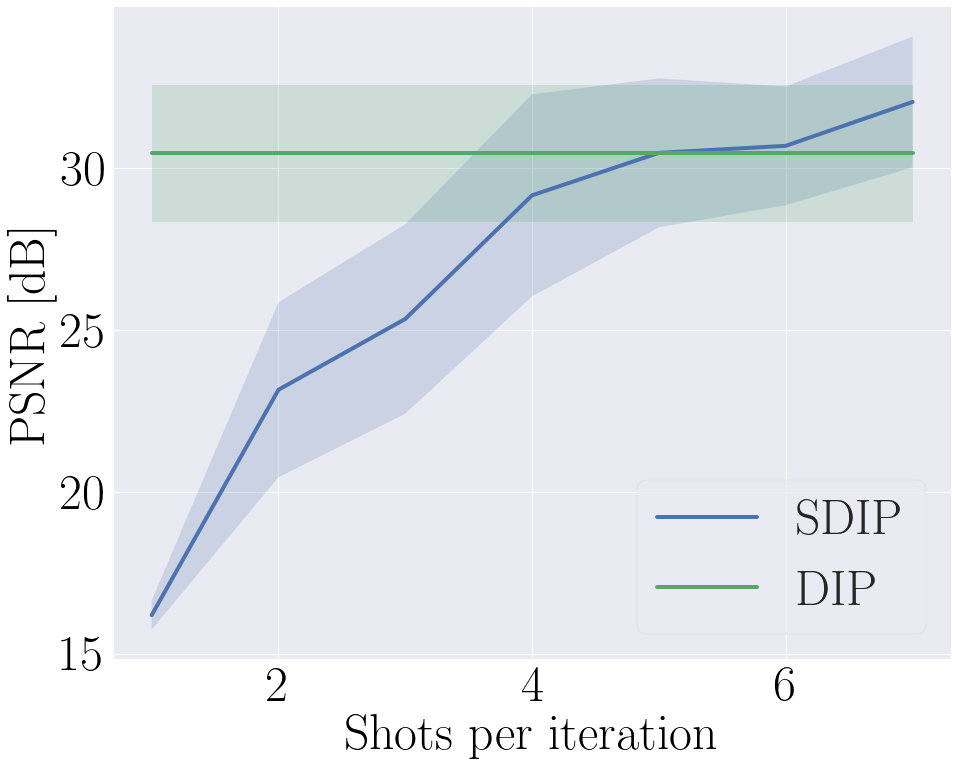

In [17]:
from matplotlib import rc
fs = 50
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
mv_psnr = np.mean(loss_v,1)
stdv_psnr = np.std(loss_v,1)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
ax1.plot(ses[:-1],mv_psnr[:-1],linewidth=4,label='SDIP')
ax1.plot(ses[:-1],np.ones((7,1))*mv_psnr[-1],linewidth=4,label='DIP')
l1 = ( mv_psnr[:-1]-stdv_psnr[:-1]/2)
l2 = (mv_psnr[:-1]+stdv_psnr[:-1]/2)
ax1.fill_between(ses[:-1], l1, l2,alpha=0.2)
l1 = np.ones((1,7))*(mv_psnr[-1]-stdv_psnr[-1]/2)
l2 = np.ones((1,7))*(mv_psnr[-1]+stdv_psnr[-1]/2)
ax1.fill_between(ses[:-1], l1[0], l2[0] ,alpha=0.2)
ax1.set_title('Random CA and CCA')
#ax1.plot(params,np.ones((7,1))*psnr_base,label = 'No Regularization',linewidth=4)

# ax2 = ax1.twinx()
#

#
#
# ax2.plot(params,mse_reg.T,label = regs_w,linewidth=4)
# ax2.plot(params,np.ones((7,1))*mse_base,label = 'No Regularization',linewidth=4)
#
#
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

ax1.set_xlabel('Shots per iteration',fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

# ax2.tick_params(axis='x',labelsize=fs)
# ax2.tick_params(axis='y',labelsize=fs)


ax1.set_ylabel('PSNR [dB]',fontsize=fs)
# ax1.set_xscale('log')
ax1.legend(fontsize=fs,loc='lower right',frameon=True)
# ax1.legend(fontsize=fs)


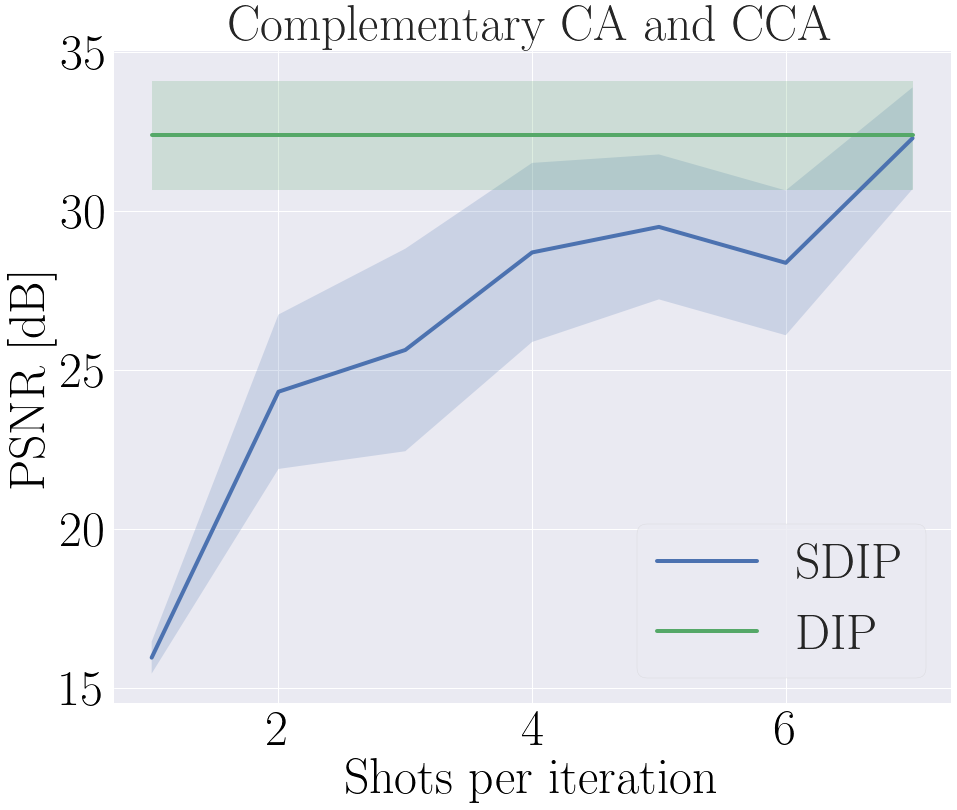

In [19]:
from matplotlib import rc
fs = 50
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
mv_psnr = np.mean(loss_v1,1)
stdv_psnr = np.std(loss_v1,1)
mv_psnr_ = np.mean(loss_v,1)
stdv_psnr_ = np.std(loss_v,1)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
ax1.plot(ses[:-1],mv_psnr[:-1],linewidth=4,label='SDIP')
ax1.plot(ses[:-1],np.ones((7,1))*mv_psnr[-1],linewidth=4,label='DIP')
l1 = ( mv_psnr[:-1]-stdv_psnr[:-1]/2)
l2 = (mv_psnr[:-1]+stdv_psnr[:-1]/2)
ax1.fill_between(ses[:-1], l1, l2,alpha=0.2)
l1 = np.ones((1,7))*(mv_psnr[-1]-stdv_psnr[-1]/2)
l2 = np.ones((1,7))*(mv_psnr[-1]+stdv_psnr[-1]/2)
ax1.fill_between(ses[:-1], l1[0], l2[0] ,alpha=0.2)
ax1.set_title('Complementary CA and CCA',fontsize=fs)
#ax1.plot(params,np.ones((7,1))*psnr_base,label = 'No Regularization',linewidth=4)

# ax2 = ax1.twinx()
#

#
#
# ax2.plot(params,mse_reg.T,label = regs_w,linewidth=4)
# ax2.plot(params,np.ones((7,1))*mse_base,label = 'No Regularization',linewidth=4)
#
#
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

ax1.set_xlabel('Shots per iteration',fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

# ax2.tick_params(axis='x',labelsize=fs)
# ax2.tick_params(axis='y',labelsize=fs)


ax1.set_ylabel('PSNR [dB]',fontsize=fs)
# ax1.set_xscale('log')
ax1.legend(fontsize=fs,loc='lower right',frameon=True)
# ax1.legend(fontsize=fs)


In [49]:


A = np.array([
    [ 0.41847, -0.15866, -0.082835],
    [-0.091169, 0.25243, 0.015708],
    [0.00092090, -0.0025498, 0.17860],             
])

def g(x, alpha, mu, sigma1, sigma2):
  sigma = (x < mu)*sigma1 + ( x >= mu)*sigma2 
  return alpha*np.exp( (x-mu)**2 / (-2*(sigma**2) ) )

component_x = lambda x: g(x, 1.056, 5998, 379, 310)  +  g(x, 0.362, 4420, 160, 267) +  g(x, -0.065, 5011, 204, 262)
component_y = lambda x: g(x, 0.821, 5688, 469, 405)  +  g(x, 0.286, 5309, 163, 311)
component_z = lambda x: g(x, 1.217, 4370, 118, 360)  +  g(x, 0.681, 4590, 260, 138)

def spec2rgb(start=450, stop=650, num=31):
    bands = np.linspace(start=start, stop=stop, num=num)*10
    XYZ = np.array( [component_x(bands), component_y(bands), component_z(bands)] )
    RGB = XYZ.T @ A.T
    RGB = RGB / np.sum(RGB, axis=0, keepdims=True)
    return RGB

# def get_rgb(a):
#   offset = 0.3
#   RGB = spec2rgb()
#   a = a + 1e-4
#   a = a / (1.2*offset + 1 - offset)  
#   a = a@RGB
#   a = a * 1
#   return a

def get_rgb(a):
  RGB = spec2rgb()
  a = a@RGB
  return a



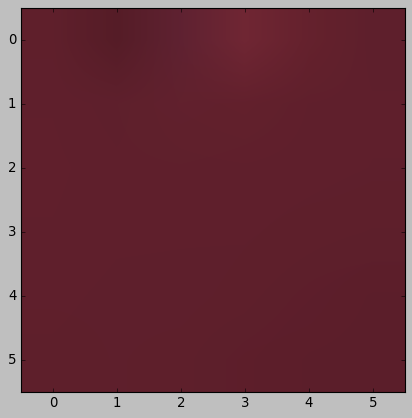

In [158]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy.ndimage import interpolation
import matplotlib as mpl
mpl.style.use('classic')
def RGBZoom(X):
    y1 = [378, 443]
    x1 = [133-55, 198-55]   
    for i in range(3):
        Y = interpolation.zoom(X[y1[0]:y1[1],x1[0]:x1[1],i],198/65)   
        X[12:210,12:210,i] = Y
    
    w = 12
    y = [12, 209]
    x = [12, 209]
    X[y[0]-w:y[0],x[0]-w:x[1]+1,0] = np.ones(shape=(w,x[1]-x[0]+w+1))
    X[y[0]-w:y[0],x[0]-w:x[1]+1,1] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    X[y[0]-w:y[0],x[0]-w:x[1]+1,2] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    
    X[y[0]:y[1]+1+w,x[0]-w:x[0],0] = np.ones(shape=(y[1]-y[0]+w+1,w))
    X[y[0]:y[1]+1+w,x[0]-w:x[0],1] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    X[y[0]:y[1]+1+w,x[0]-w:x[0],2] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,0] = np.ones(shape=(w,x[1]-x[0]+w+1))
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,1] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,2] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,0] = np.ones(shape=(y[1]-y[0]+w+1,w))
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,1] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,2] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    
    w = 4
    y =y1
    x =x1
    X[y[0]-w:y[0],x[0]-w:x[1]+1,0] = np.ones(shape=(w,x[1]-x[0]+w+1))
    X[y[0]-w:y[0],x[0]-w:x[1]+1,1] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    X[y[0]-w:y[0],x[0]-w:x[1]+1,2] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    
    X[y[0]:y[1]+1+w,x[0]-w:x[0],0] = np.ones(shape=(y[1]-y[0]+w+1,w))
    X[y[0]:y[1]+1+w,x[0]-w:x[0],1] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    X[y[0]:y[1]+1+w,x[0]-w:x[0],2] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,0] = np.ones(shape=(w,x[1]-x[0]+w+1))
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,1] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,2] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,0] = np.ones(shape=(y[1]-y[0]+w+1,w))
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,1] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,2] = np.zeros(shape=(y[1]-y[0]+w+1,w))
            
            
    return X


img=4
data_path = 'C:\Roman\datasets\kaist/all_images/Image_'+str(img)
Mat = scipy.io.loadmat(data_path)
# testSI=np.double(Mat['im'])
testSI = np.double(Mat['img'])
GT = testSI / np.max(testSI)
GT = tf.cast(tf.expand_dims(GT,0),rec.dtype)**0.8

  
im_rgb_sifcm_r = tf.squeeze(get_rgb(GT))
im_rgb_sifcm_r = tf.abs(im_rgb_sifcm_r)/np.max(im_rgb_sifcm_r)
fig = RGBZoom(im_rgb_sifcm_r.numpy())

plt.imshow(fig[350:356,350:356,:])
# plt.axis('off')
# plt.savefig('gt_4.svg')

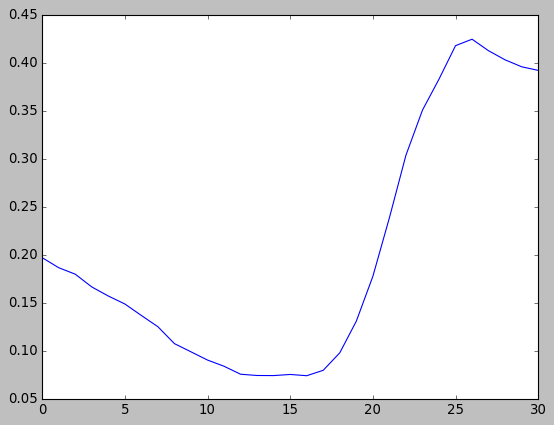

In [159]:
gt_sig = np.squeeze(np.mean(np.mean(GT[:,350:356,350:356,:],axis=1),axis=1))
gt_sig.shape
plt.plot(gt_sig)

In [161]:
shots_hs = 4
shots_ms = 4
results_folder = 'results_dataset'

total_shots = shots_ms+shots_hs
ses = list(range(1,total_shots+1))
imgs = 22
rec_sigs = []
sams = []
for i,shots_per_eval in enumerate([4,6,8]):
        for j,image in enumerate([4]):
                path = f'{results_folder}/init_sms{shots_ms}_shs_{shots_hs}_se_{shots_per_eval}_im_{image}/metrics.mat'
                a = scipy.io.loadmat(path)
                psnr_v[i,j] = np.max(a['psnr'])
                rec = a['rec']
                rec_sigs.append(np.squeeze(np.mean(np.mean(rec[350:356,350:356,:],axis=0),axis=0)))
                sam = np.arccos(np.dot(gt_sig,rec_sigs[i])/(np.linalg.norm(gt_sig)*np.linalg.norm(rec_sigs[i])))

                sams.append(round(sam,3))

                # time_v[i,j] = np.max(a['time'])



In [162]:
sams

[0.129, 0.124, 0.144]

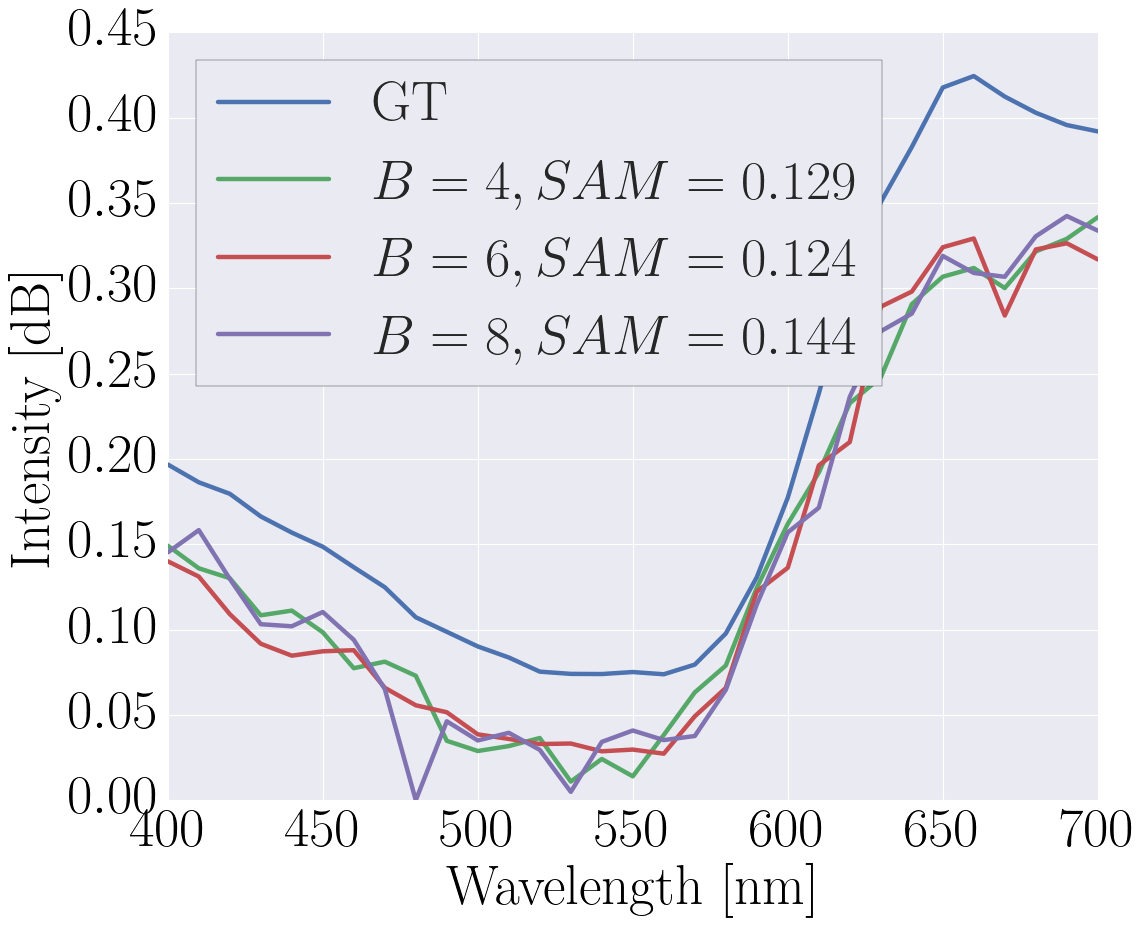

In [163]:
from matplotlib import rc
wave = np.linspace(400,700,31)
fs = 50
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
ax1.plot(wave,gt_sig,linewidth=4,label='GT')
for i,s in enumerate([4,6,8]):
    ax1.plot(wave,rec_sigs[i],linewidth=4,label='$B='+ str(s) + ', SAM = '+str(sams[i])+ '$')

#ax1.plot(params,np.ones((7,1))*psnr_base,label = 'No Regularization',linewidth=4)

# ax2 = ax1.twinx()
#

#
#
# ax2.plot(params,mse_reg.T,label = regs_w,linewidth=4)
# ax2.plot(params,np.ones((7,1))*mse_base,label = 'No Regularization',linewidth=4)
#
#
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

ax1.set_xlabel('Wavelength [nm]',fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

# ax2.tick_params(axis='x',labelsize=fs)
# ax2.tick_params(axis='y',labelsize=fs)


ax1.set_ylabel('Intensity',fontsize=fs)
# ax1.set_xscale('log')
ax1.legend(fontsize=fs,loc='upper left',frameon=True)
# ax1.legend(fontsize=fs)
plt.savefig('sig_4_2.svg')


In [17]:
import tensorflow.keras.backend as K
import numpy as np

from os import listdir
from os.path import isfile,join

train_path = 'C:\Roman\datasets\icvl/validation'
hyperfiles = [fn for fn in listdir(train_path) if isfile(join(train_path, fn)) and fn.lower().endswith('.mat')]
psnr = np.zeros((20,1))
ssim = np.zeros((20,1))
sam = np.zeros((20,1))
for i,image in enumerate(range(1,21)):
    # for j,snr in enumerate([20,25,30,35]):
    
        img = scipy.io.loadmat(f'C:\Roman\Fusion\CSI-Fusion_v2_edited\Results_SDIP/recover_snr_Inf_img_{image}')['x_est']
        gt = scipy.io.loadmat(train_path + '/' + hyperfiles[image-1] )['rad'][128:128+256,128:128+256, 0:30]
        
        pt = tf.image.psnr(img,gt,1)
        st = tf.image.ssim(img,gt,1)
        ct = cos_distance(img,gt)

        psnr[i] = pt
        ssim[i] = st
        sam[i] = ct

In [18]:
print(np.mean(psnr,0))
print(np.mean(ssim,0))
print(np.mean(sam,0))

[30.1928318]
[0.81612814]
[0.07043146]


In [46]:
import tensorflow.keras.backend as K
import numpy as np
def cos_distance(y_true, y_pred):
    def l2_normalize(x, axis):
        norm = K.sqrt(K.sum(K.square(x), axis=axis, keepdims=True))
        return K.maximum(x, K.epsilon()) / K.maximum(norm, K.epsilon())

    y_true = l2_normalize(y_true, axis=-1)
    y_pred = l2_normalize(y_pred, axis=-1)
    return tf.math.acos(K.mean(K.sum(y_true * y_pred, axis=-1)))


train_path = 'C:\Roman\datasets\icvl/validation'
hyperfiles = [fn for fn in listdir(train_path) if isfile(join(train_path, fn)) and fn.lower().endswith('.mat')]
psnr = np.zeros((20,5))
ssim = np.zeros((20,5))
sam = np.zeros((20,5))
for i,image in enumerate(range(20)):
    for j,snr in enumerate([1,20,25,30,35]):
    
        img = tf.transpose(scipy.io.loadmat(f'C:\Roman\Fusion\LADMM_v2/arad_results_random_2/noise_image/img_{image}_snr_{snr}.mat')['recon'],[0,2,3,1])
        gt = tf.transpose(scipy.io.loadmat(f'C:\Roman\Fusion\LADMM_v2/arad_results_random_2/noise_image/img_{image}_snr_{snr}.mat')['gt'],[0,2,3,1])
        # gt = scipy.io.loadmat(train_path + '/' + hyperfiles[image-1] )['rad'][128:128+256,128:128+256, 0:30]
        gt = gt/np.max(gt)
        img = tf.cast(img,gt.dtype)
        pt = tf.image.psnr(img,gt,1)
        st = tf.image.ssim(img,gt,1)
        ct = cos_distance(img,gt)

        psnr[i,j] = pt
        ssim[i,j] = st
        sam[i,j] = ct

In [47]:
print(np.mean(psnr,0))
print(np.mean(ssim,0))
print(np.mean(sam,0))

[28.13559484 24.33955097 26.42786703 27.51194668 27.91663609]
[0.84006996 0.4860461  0.66165204 0.76873154 0.81507727]
[0.15728807 0.39059339 0.27728829 0.20896448 0.1764549 ]


In [109]:
psnr

array([[35.12398148, 30.14776039, 33.42287064, 34.48358917, 34.864048  ],
       [32.52878189, 29.07275391, 30.87877464, 31.90071106, 32.12706757],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


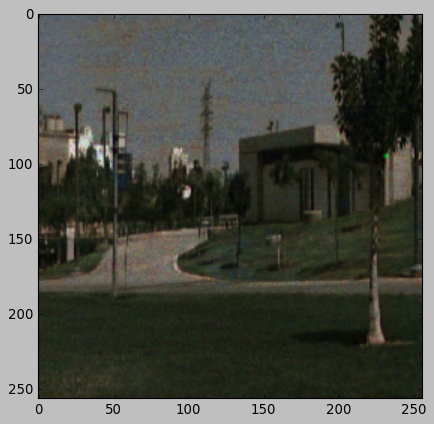

In [112]:
plt.style.use('classic')
plt.imshow(np.squeeze(img.numpy()[:,:,:,[25,15,9]]))

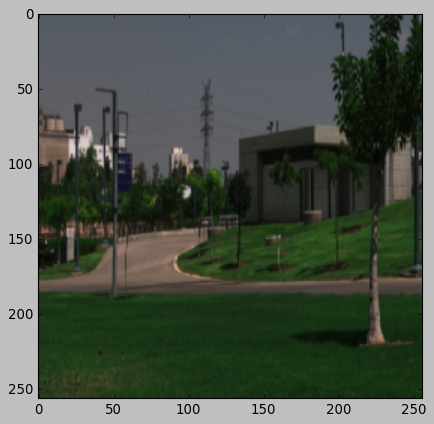

In [114]:
plt.imshow(np.squeeze(gt.numpy()[:,:,:,[25,15,9]]))